In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cumulative.csv to cumulative.csv


In [ ]:
import pandas as pd

dataset = pd.read_csv('cumulative.csv')

print(dataset.head())

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064    

In [ ]:
# Identify null values in each column
print(dataset.isnull().sum())

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

Based on typical analyses with the Kepler dataset, some columns that might be particularly informative:

koi_score: This is the confidence score of the KOI being a candidate. It could help differentiate between more and less certain observations.

koi_period: The orbital period of the candidate planet. This could reveal clustering based on how long it takes a planet to orbit its star.

koi_impact: The impact parameter; it relates to how close the planet comes to the star's center during transit, influencing transit duration and depth.

koi_duration: Transit duration; the time the transit event lasts, which is crucial for understanding orbit and size.

koi_depth: The depth of the transit; related to the percentage drop in brightness during transit, indicating planet size relative to the star.

koi_prad: Planetary radius; important for distinguishing between types of planets (e.g., Earth-like, gas giants).

koi_teq: Equilibrium temperature; estimated based on the stellar flux and distance from the star, crucial for understanding habitability.

koi_insol: Insolation flux; how much sunlight the planet receives, another factor in potential habitability.

koi_steff, koi_slogg, koi_srad: Stellar parameters such as effective temperature, surface gravity, and radius, which are important for contextualizing planetary data.

In [ ]:
columns = ['koi_disposition', 'koi_score', 'koi_period', 'koi_impact', 'koi_duration', 'koi_depth',
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']
filtered_dataset = dataset[columns]

In [ ]:
print(filtered_dataset.head())

  koi_disposition  koi_score  koi_period  koi_impact  koi_duration  koi_depth  \
0       CONFIRMED      1.000    9.488036       0.146       2.95750      615.8   
1       CONFIRMED      0.969   54.418383       0.586       4.50700      874.8   
2  FALSE POSITIVE      0.000   19.899140       0.969       1.78220    10829.0   
3  FALSE POSITIVE      0.000    1.736952       1.276       2.40641     8079.2   
4       CONFIRMED      1.000    2.525592       0.701       1.65450      603.3   

   koi_prad  koi_teq  koi_insol  koi_steff  koi_slogg  koi_srad  
0      2.26    793.0      93.59     5455.0      4.467     0.927  
1      2.83    443.0       9.11     5455.0      4.467     0.927  
2     14.60    638.0      39.30     5853.0      4.544     0.868  
3     33.46   1395.0     891.96     5805.0      4.564     0.791  
4      2.75   1406.0     926.16     6031.0      4.438     1.046  


In [ ]:
# Print the number of missing values per column to decide
print(filtered_dataset.isnull().sum())



koi_disposition       0
koi_score          1510
koi_period            0
koi_impact          363
koi_duration          0
koi_depth           363
koi_prad            363
koi_teq             363
koi_insol           321
koi_steff           363
koi_slogg           363
koi_srad            363
dtype: int64


In [ ]:

filtered_dataset.dropna(inplace=True)

<ipython-input-6-fc7e8b342835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.dropna(inplace=True)


In [ ]:
print(filtered_dataset.isnull().sum())

koi_disposition    0
koi_score          0
koi_period         0
koi_impact         0
koi_duration       0
koi_depth          0
koi_prad           0
koi_teq            0
koi_insol          0
koi_steff          0
koi_slogg          0
koi_srad           0
dtype: int64


In [ ]:
print(filtered_dataset.dtypes)

koi_disposition     object
koi_score          float64
koi_period         float64
koi_impact         float64
koi_duration       float64
koi_depth          float64
koi_prad           float64
koi_teq            float64
koi_insol          float64
koi_steff          float64
koi_slogg          float64
koi_srad           float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
filtered_dataset['koi_disposition'] = encoder.fit_transform(filtered_dataset['koi_disposition'])

<ipython-input-23-aa38b06550df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['koi_disposition'] = encoder.fit_transform(filtered_dataset['koi_disposition'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_columns = [col for col in columns if col != 'koi_disposition']
filtered_dataset[feature_columns] = scaler.fit_transform(filtered_dataset[feature_columns])


<ipython-input-24-64dfafece3ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset[feature_columns] = scaler.fit_transform(filtered_dataset[feature_columns])


In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(filtered_dataset[feature_columns])

# Add t-SNE results back to the dataframe for easy plotting
filtered_dataset['TSNE-1'] = tsne_results[:, 0]
filtered_dataset['TSNE-2'] = tsne_results[:, 1]


<ipython-input-25-f1b7aff09a79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['TSNE-1'] = tsne_results[:, 0]
<ipython-input-25-f1b7aff09a79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['TSNE-2'] = tsne_results[:, 1]


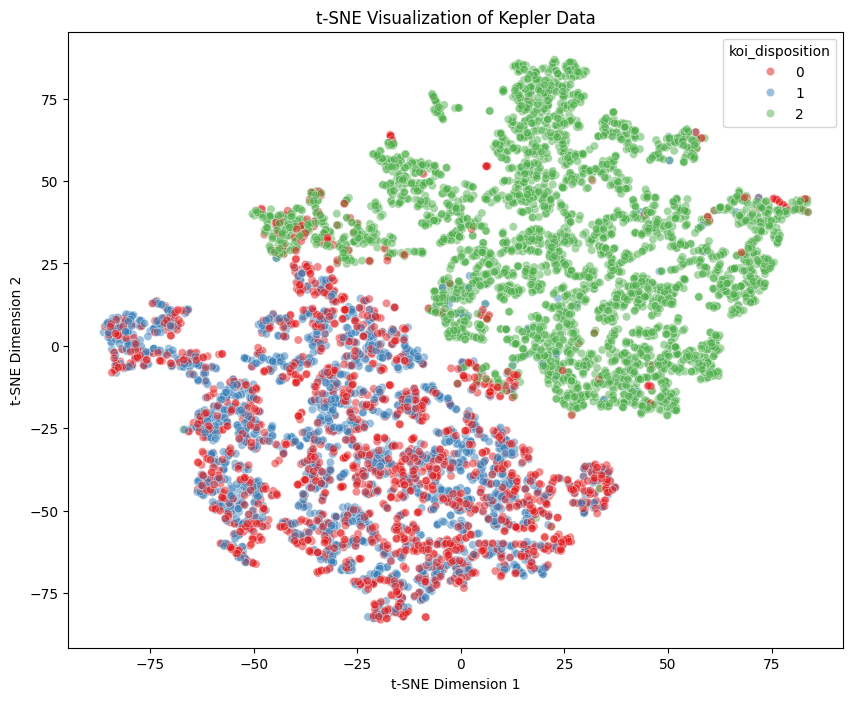

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='koi_disposition',
    palette=sns.color_palette("Set1", len(filtered_dataset['koi_disposition'].unique())),
    data=filtered_dataset,
    legend="full",
    alpha=0.5
)
plt.title('t-SNE Visualization of Kepler Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Encoding mapping:", mapping)

Encoding mapping: {'CANDIDATE': 0, 'CONFIRMED': 1, 'FALSE POSITIVE': 2}
